# Machine Learning Obesity Dataset
Nama : Aaron Winston Gho
NIM : 2702210522

### Dataset goals
Tujuan utamanya adalah untuk memprediksi tingkat obesitas dari seseorang.

### Dataset B (Genap) Columns Information:
1. Gender = Laki-laki atau Wanita
2. Age = Usia seseorang dalam tahun
3. Height = Tinggi dalam meter
4. Weight = Berat dalam kilogram
5. family_history_with_overweight = Apakah orang tersebut memiliki riwayat keluarga dengan kelebihan
berat badan
7. FAVC = Jika orang tersebut sering mengonsumsi makanan berkalori tinggi (ya/tidak)
8. FCVC = Frekuensi konsumsi sayuran (skala dari 1 hingga 3)
9. NCP = Jumlah makanan utama per hari
10. CAEC = Frekuensi mengonsumsi makanan di antara waktu makan (Tidak pernah, Kadang-kadang,
Sering, Selalu)
11. SMOKE = Apakah orang tersebut merokok (ya/tidak)
12. CH2O = Asupan air harian (skala dari 1 hingga 3)
13. SCC = Jika orang tersebut memantau asupan kalori mereka (ya/tidak)
14. FAF = Frekuensi aktivitas fisik (skala dari 0 hingga 3)
15. TUE = Waktu yang dihabiskan untuk menggunakan teknologi (skala dari 0 hingga 3)
16. CALC = Frekuensi konsumsi alkohol (Tidak pernah, Kadang-kadang, Sering, Selalu)
17. MTRANS = Moda transportasi utama (Mobil, Sepeda, Sepeda Motor, Transportasi Umum, Jalan Kaki)
18. NObeyesedad = Tingkat obesitas (Insufficient Weight, Normal Weight, Overweight Level I, Overweight
Level II, Obesity Type I, Obesity Type II, Obesity Type III)

In [231]:
# Data manipulation libraries
import numpy as np
import pandas as pd

# Correlation test & visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


#sklearn libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import roc_curve,auc
from scipy.stats import skew, kurtosis
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

#Machine learning libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC


# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pickle

# EDA

## Read the Datasets & Overall Looks

In [187]:
df = pd.read_csv('ObesityDataSet2.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,24,1.58,65.29,yes,no,2.03,2.74,Sometimes,no,2.00,no,1.28,1.019,no,Public_Transportation,Overweight_Level_II
1,Male,23,1.65,66.00,no,no,3.00,3.00,Sometimes,no,2.00,no,3.00,0.000,no,Public_Transportation,Normal_Weight
2,Female,21,1.69,51.26,yes,yes,3.00,3.18,Frequently,no,1.91,no,0.48,0.625,no,Public_Transportation,Insufficient_Weight
3,Female,22,1.69,65.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,1.00,1.000,Sometimes,Public_Transportation,Normal_Weight
4,Female,23,1.61,82.64,yes,yes,2.96,1.00,Sometimes,no,2.98,no,0.74,2.000,Sometimes,Public_Transportation,Obesity_Type_I


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1056 non-null   object 
 1   Age                             1056 non-null   object 
 2   Height                          1056 non-null   float64
 3   Weight                          1056 non-null   float64
 4   family_history_with_overweight  1056 non-null   object 
 5   FAVC                            1056 non-null   object 
 6   FCVC                            1019 non-null   float64
 7   NCP                             1056 non-null   float64
 8   CAEC                            1056 non-null   object 
 9   SMOKE                           1056 non-null   object 
 10  CH2O                            1056 non-null   float64
 11  SCC                             1056 non-null   object 
 12  FAF                             10

Tipe data sudah sesuai untuk numerik seperti Height, Weight, dan lain-lain (float64), kecuali kolom Age yang ternyata masih object, padahal seharusnya numerik juga.
Selain itu, kelihatan juga ada beberapa kolom yang nggak full 1056 non-null, misalnya FCVC (hanya 1019, berarti ada nilai kosong) dan MTRANS (hanya 1030). Kolom lain semuanya lengkap.
Nanti kolom Age ini perlu dikonversi ke angka (float/int), dan missing value akan dicek detail di step berikutnya.

## Statistical Numeric Insights

In [189]:
df.describe()

,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1056.000000,1056.000000,1019.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,1.700066,86.497633,2.421374,2.651686,1.998002,0.987528,0.642227
std,0.091560,26.181219,0.537591,0.804457,0.612930,0.850452,0.615533
min,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.630000,66.000000,2.000000,2.525000,1.530000,0.110000,0.000000
50%,1.700000,82.635000,2.390000,3.000000,2.000000,1.000000,0.583000
75%,1.760000,107.965000,3.000000,3.000000,2.442500,1.602500,1.000000
max,1.950000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


- Height
Dari sini bisa dilihat kalau tinggi badan rata-rata responden itu sekitar 1.70 meter, dan rentangnya juga nggak terlalu ekstrem, paling pendek 1.45 dan paling tinggi 1.95 meter. Artinya, variasi tinggi badan di data ini masih wajar dan nggak ada nilai yang aneh banget.

- Weight
Nilai berat badan rata-rata responden ada di angka 86.5 kg, dan ada juga yang sampai 173 kg. Ini nunjukkin kalau di dataset ini ada cukup banyak yang berat badannya tinggi banget, jadi kelompok obesitas kemungkinan memang cukup banyak.

- FCVC
Nilai rata-rata konsumsi sayur itu 2.42 dari maksimal 3, jadi kebanyakan responden bisa dibilang rajin makan sayur setiap hari. Dari sini juga kelihatan pola makan sehat cukup dominan.

- NCP
Mayoritas responden makan utama 2 sampai 3 kali sehari. Pola makan ini sesuai sama kebiasaan umum yang biasanya ditemui sehari-hari.

- CH2O
Rata-rata konsumsi airnya hampir 2 liter per hari, jadi sebagian besar responden udah memenuhi kebutuhan cairan yang dianjurkan. Ini cukup positif dari sisi pola hidup sehat.

- FAF
Frekuensi olahraga rata-rata satu jam per hari, tapi ada juga beberapa responden yang sama sekali nggak olahraga. Jadi, bisa dibilang ada kelompok yang aktif, tapi ada juga yang benar-benar kurang aktivitas fisik.

- TUE
Penggunaan teknologi rata-rata cuma sekitar 0.6 jam per hari, maksimal 2 jam. Sebagian besar nggak terlalu lama main gadget atau depan layar, jadi aktivitas digitalnya relatif rendah di data ini.

## Duplicate Values

In [190]:
print("Jumlah data sebelum cek duplikat:", len(df))

duplikat = df.duplicated().sum()
print("Jumlah baris duplikat:", duplikat)

df = df.drop_duplicates().reset_index(drop=True)
print("Jumlah data setelah hapus duplikat:", len(df))

Jumlah data sebelum cek duplikat: 1056
Jumlah baris duplikat: 10
Jumlah data setelah hapus duplikat: 1046


disini ada 10 data yang duplikat karena nantinya data ini bisa ngebuat model kita bias so kita langsung hapus aja

## Missing Values

In [191]:
missing = df.isnull().sum()
missing_percent = df.isnull().mean() * 100
missing_df = pd.DataFrame({'missing': missing, 'percent': missing_percent})
print(missing_df)


                                missing   percent
Gender                                0  0.000000
Age                                   0  0.000000
Height                                0  0.000000
Weight                                0  0.000000
family_history_with_overweight        0  0.000000
FAVC                                  0  0.000000
FCVC                                 37  3.537285
NCP                                   0  0.000000
CAEC                                  0  0.000000
SMOKE                                 0  0.000000
CH2O                                  0  0.000000
SCC                                   0  0.000000
FAF                                   0  0.000000
TUE                                   0  0.000000
CALC                                  0  0.000000
MTRANS                               26  2.485660
NObeyesdad                            0  0.000000


Di sini kita bisa langsung lihat kolom mana aja yang masih ada nilai kosong, dan seberapa banyak persentasenya. Kalau jumlah yang kosong di bawah 5%, disini kita akan langsung drop aja barisnya supaya datanya tetap rapi dan modelnya nggak terganggu.


In [192]:
df = df.dropna().reset_index(drop=True)
print("Jumlah data setelah drop missing:", len(df))

Jumlah data setelah drop missing: 984


## Unique Character Categorical Column

In [193]:
cat_cols = df.select_dtypes(include='object').columns.tolist()

for col in cat_cols:
    print(f"{col}: {df[col].unique()}")


Gender: ['Female' 'Male']
Age: ['24' '23' '21' '22' '26' '18' '25' '20' '32' '19' '38' '34' '44'
 '22 years' '17 years' '17' '41' '29' '31' '39' '27' '16' '25 years' '40'
 '21 years' '33' '30' '37' '35' '36' '15' '19 years' '28' '55' '46'
 '36 years' '26 years' '42' '33 years' '43' '51' '45' '48' '23 years']
family_history_with_overweight: ['yes' 'no']
FAVC: ['no' 'yes']
CAEC: ['Sometimes' 'Frequently' 'no' 'Always']
SMOKE: ['no' 'yes']
SCC: ['no' 'yes']
CALC: ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS: ['Public_Transportation' 'Bike' 'Automobile' 'Motorbike' 'Walking']
NObeyesdad: ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_I' 'Obesity_Type_III' 'Overweight_Level_I'
 'Obesity_Type_II']


Di kolom Age, masih ada beberapa data yang formatnya belum rapi, seperti ada tulisan tambahan “years” setelah angkanya. Kondisi kayak gini harus dibersihkan dulu supaya semua data umur bisa langsung diproses sebagai angka tanpa hambatan nantinya.

In [194]:
df['Age'] = df['Age'].str.replace(' years', '').astype(int)

## Splitting Numerical & Categorical Column

In [195]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

print("Kolom numerik:", num_cols)
print("Kolom kategorikal:", cat_cols)


Kolom numerik: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Kolom kategorikal: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


## Visualization Numerical

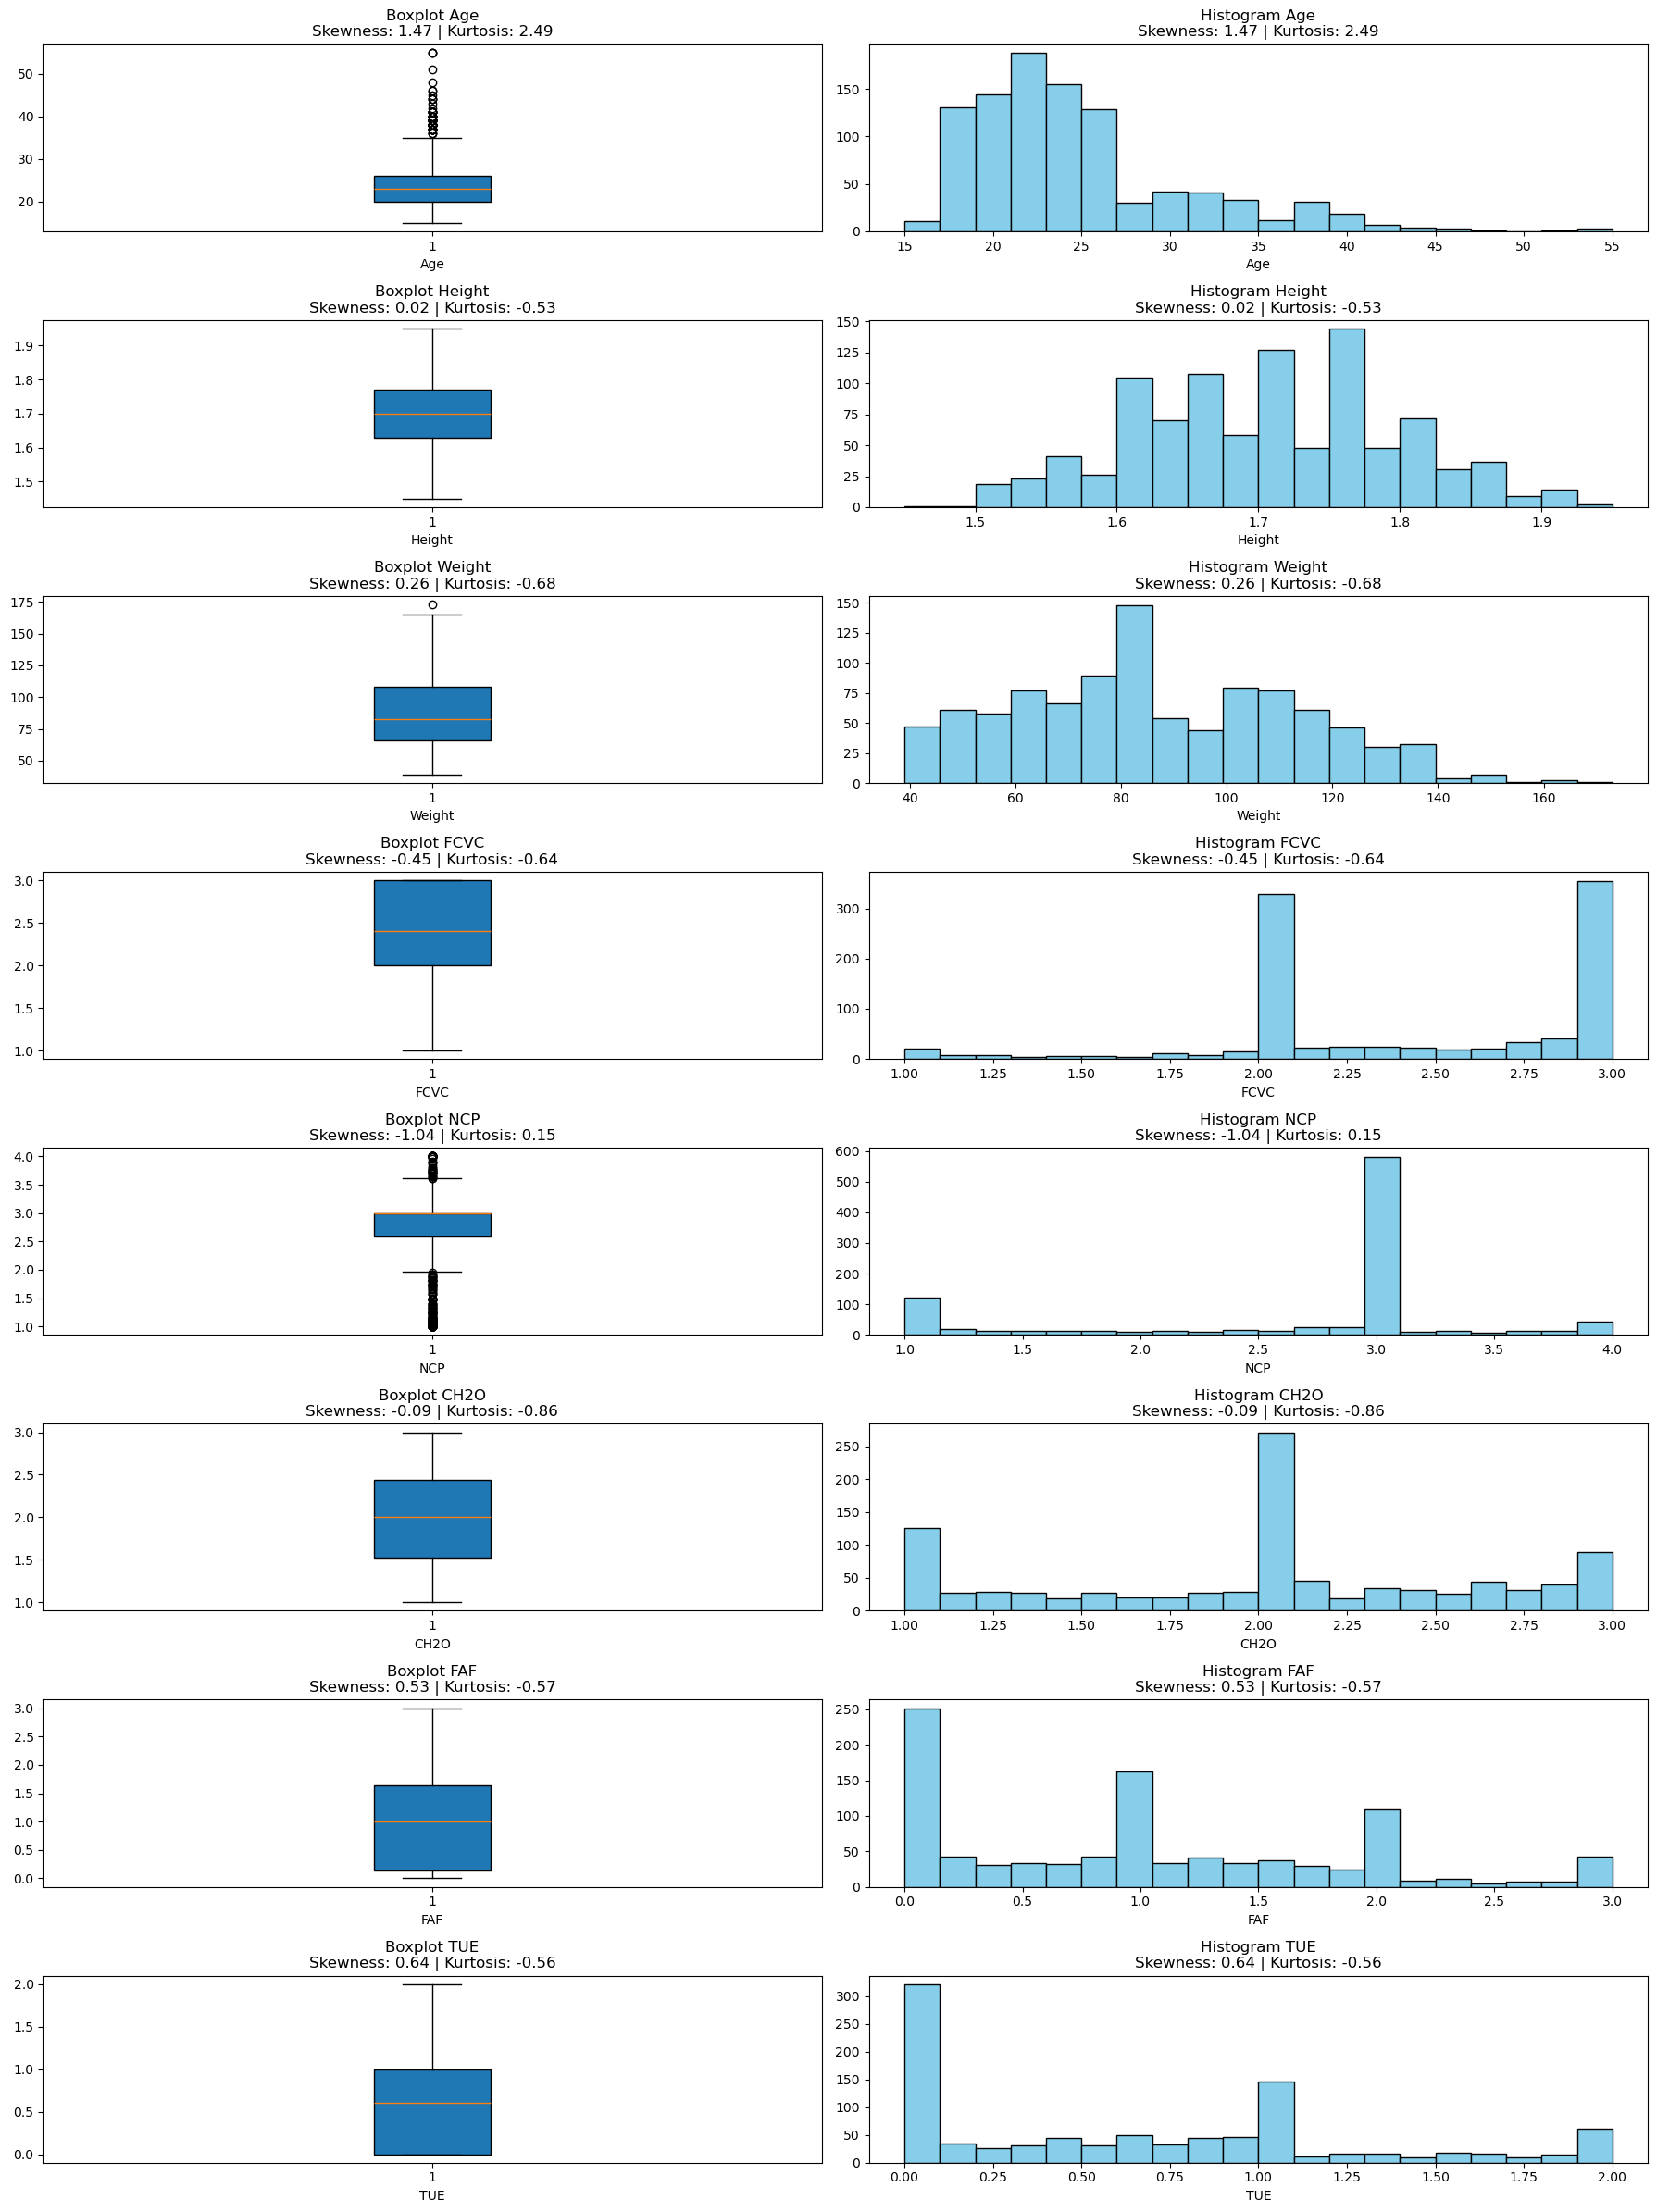

In [232]:
plt.figure(figsize=(18, len(num_cols)*3))

for i, col in enumerate(num_cols):
    data = df[col].dropna() 
    skewness = skew(data)
    kurt = kurtosis(data)  
    
    # Boxplot
    plt.subplot(len(num_cols), 2, 2*i+1)
    plt.boxplot(data, patch_artist=True)
    plt.title(f'Boxplot {col}\nSkewness: {skewness:.2f} | Kurtosis: {kurt:.2f}')
    plt.xlabel(col)
    
    # Histogram
    plt.subplot(len(num_cols), 2, 2*i+2)
    plt.hist(data, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram {col}\nSkewness: {skewness:.2f} | Kurtosis: {kurt:.2f}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


1. Age
- Skewness positif (1.17): distribusi usia cenderung miring ke kanan, artinya lebih banyak responden di kelompok usia muda, sementara ada beberapa responden dengan usia sedikit lebih tua.
- Kurtosis positif (2.49): menandakan puncak distribusi yang lebih tinggi dari normal, dengan ekor yang sedikit lebih panjang (beberapa nilai usia lebih ekstrem, tapi bukan outlier parah).
- Insight: Usia responden mayoritas awal 20-an, tidak banyak responden usia jauh di atas rata-rata. Data usia cenderung terkonsentrasi di rentang 21–25 tahun.
2. Height
- Skewness mendekati 0 (0.02): distribusi tinggi badan sangat simetris (mendekati normal).
- Kurtosis negatif (-0.53): puncak distribusi lebih datar dari normal, artinya sebaran tinggi badan cukup rata dan tidak banyak nilai ekstrem.
- Insight: Data tinggi badan bersih dan seimbang, mayoritas di sekitar 1.7 meter, tanpa outlier yang mengganggu.
3. Weight
- Skewness negatif (-0.26): distribusi agak miring ke kiri (skewed left), artinya lebih banyak responden dengan berat badan di bawah rata-rata, namun ada juga beberapa responden dengan berat badan sangat tinggi (outlier ke kanan).
- Kurtosis negatif (-0.68): distribusi lebih datar, mengindikasikan penyebaran berat badan yang bervariasi.
- Insight: Ada cukup banyak variasi berat badan, dengan beberapa responden obesitas yang menjadi outlier di sisi atas boxplot.
4. FCVC (Frekuensi Konsumsi Sayur)
- Skewness negatif (-0.45): sedikit miring ke kiri, sebagian besar responden memiliki kebiasaan makan sayur yang rutin.
- Kurtosis negatif (-0.64): sebaran datanya agak datar, artinya mayoritas nilai berada di tengah (kebiasaan makan sayur stabil).
- Insight: Data cenderung baik, tidak ada outlier, sebagian besar responden punya pola konsumsi sayur yang baik.
5. NCP (Jumlah Makan Utama)
- Skewness negatif (-1.04): distribusi miring ke kiri, artinya lebih banyak responden yang makan utama lebih sering.
- Kurtosis positif (0.15): puncak distribusi hampir normal, artinya data konsisten di sekitar nilai rata-rata.
- Insight: Pola makan utama relatif rutin (2–3 kali/hari), mayoritas responden konsisten, tanpa outlier signifikan.
6. CH2O (Konsumsi Air Harian)
- Skewness negatif (-0.09): hampir simetris.
- Kurtosis negatif (-0.86): sebaran datanya lebih datar dari normal.
- Insight: Mayoritas konsumsi air per hari sekitar 2 liter, tidak ada nilai ekstrim yang menonjol.
7. FAF (Frekuensi Aktivitas Fisik)
- Skewness positif (0.53): distribusi sedikit miring ke kanan, cukup banyak responden dengan aktivitas fisik rendah.
- Kurtosis negatif (-0.57): sebaran data lebih datar dari normal.
- Insight: Banyak responden dengan aktivitas fisik rendah hingga sedang, hanya sedikit yang sangat aktif.
8. TUE (Waktu Menggunakan Teknologi)
- Skewness positif (0.64): data miring ke kanan, mayoritas responden hanya sedikit waktu menggunakan perangkat teknologi, dengan sedikit responden di angka tinggi.
- Kurtosis negatif (-0.56): sebaran cukup datar.
- Insight: Kebiasaan penggunaan teknologi sebagian besar di bawah 1 jam, sangat sedikit responden yang waktu hariannya tinggi.

## Visualization Categorical

/var/folders/k8/0jttqwyj0vdg5y3q78vqjy1c0000gn/T/ipykernel_25439/4183506693.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='viridis')
/var/folders/k8/0jttqwyj0vdg5y3q78vqjy1c0000gn/T/ipykernel_25439/4183506693.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='viridis')
/var/folders/k8/0jttqwyj0vdg5y3q78vqjy1c0000gn/T/ipykernel_25439/4183506693.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,

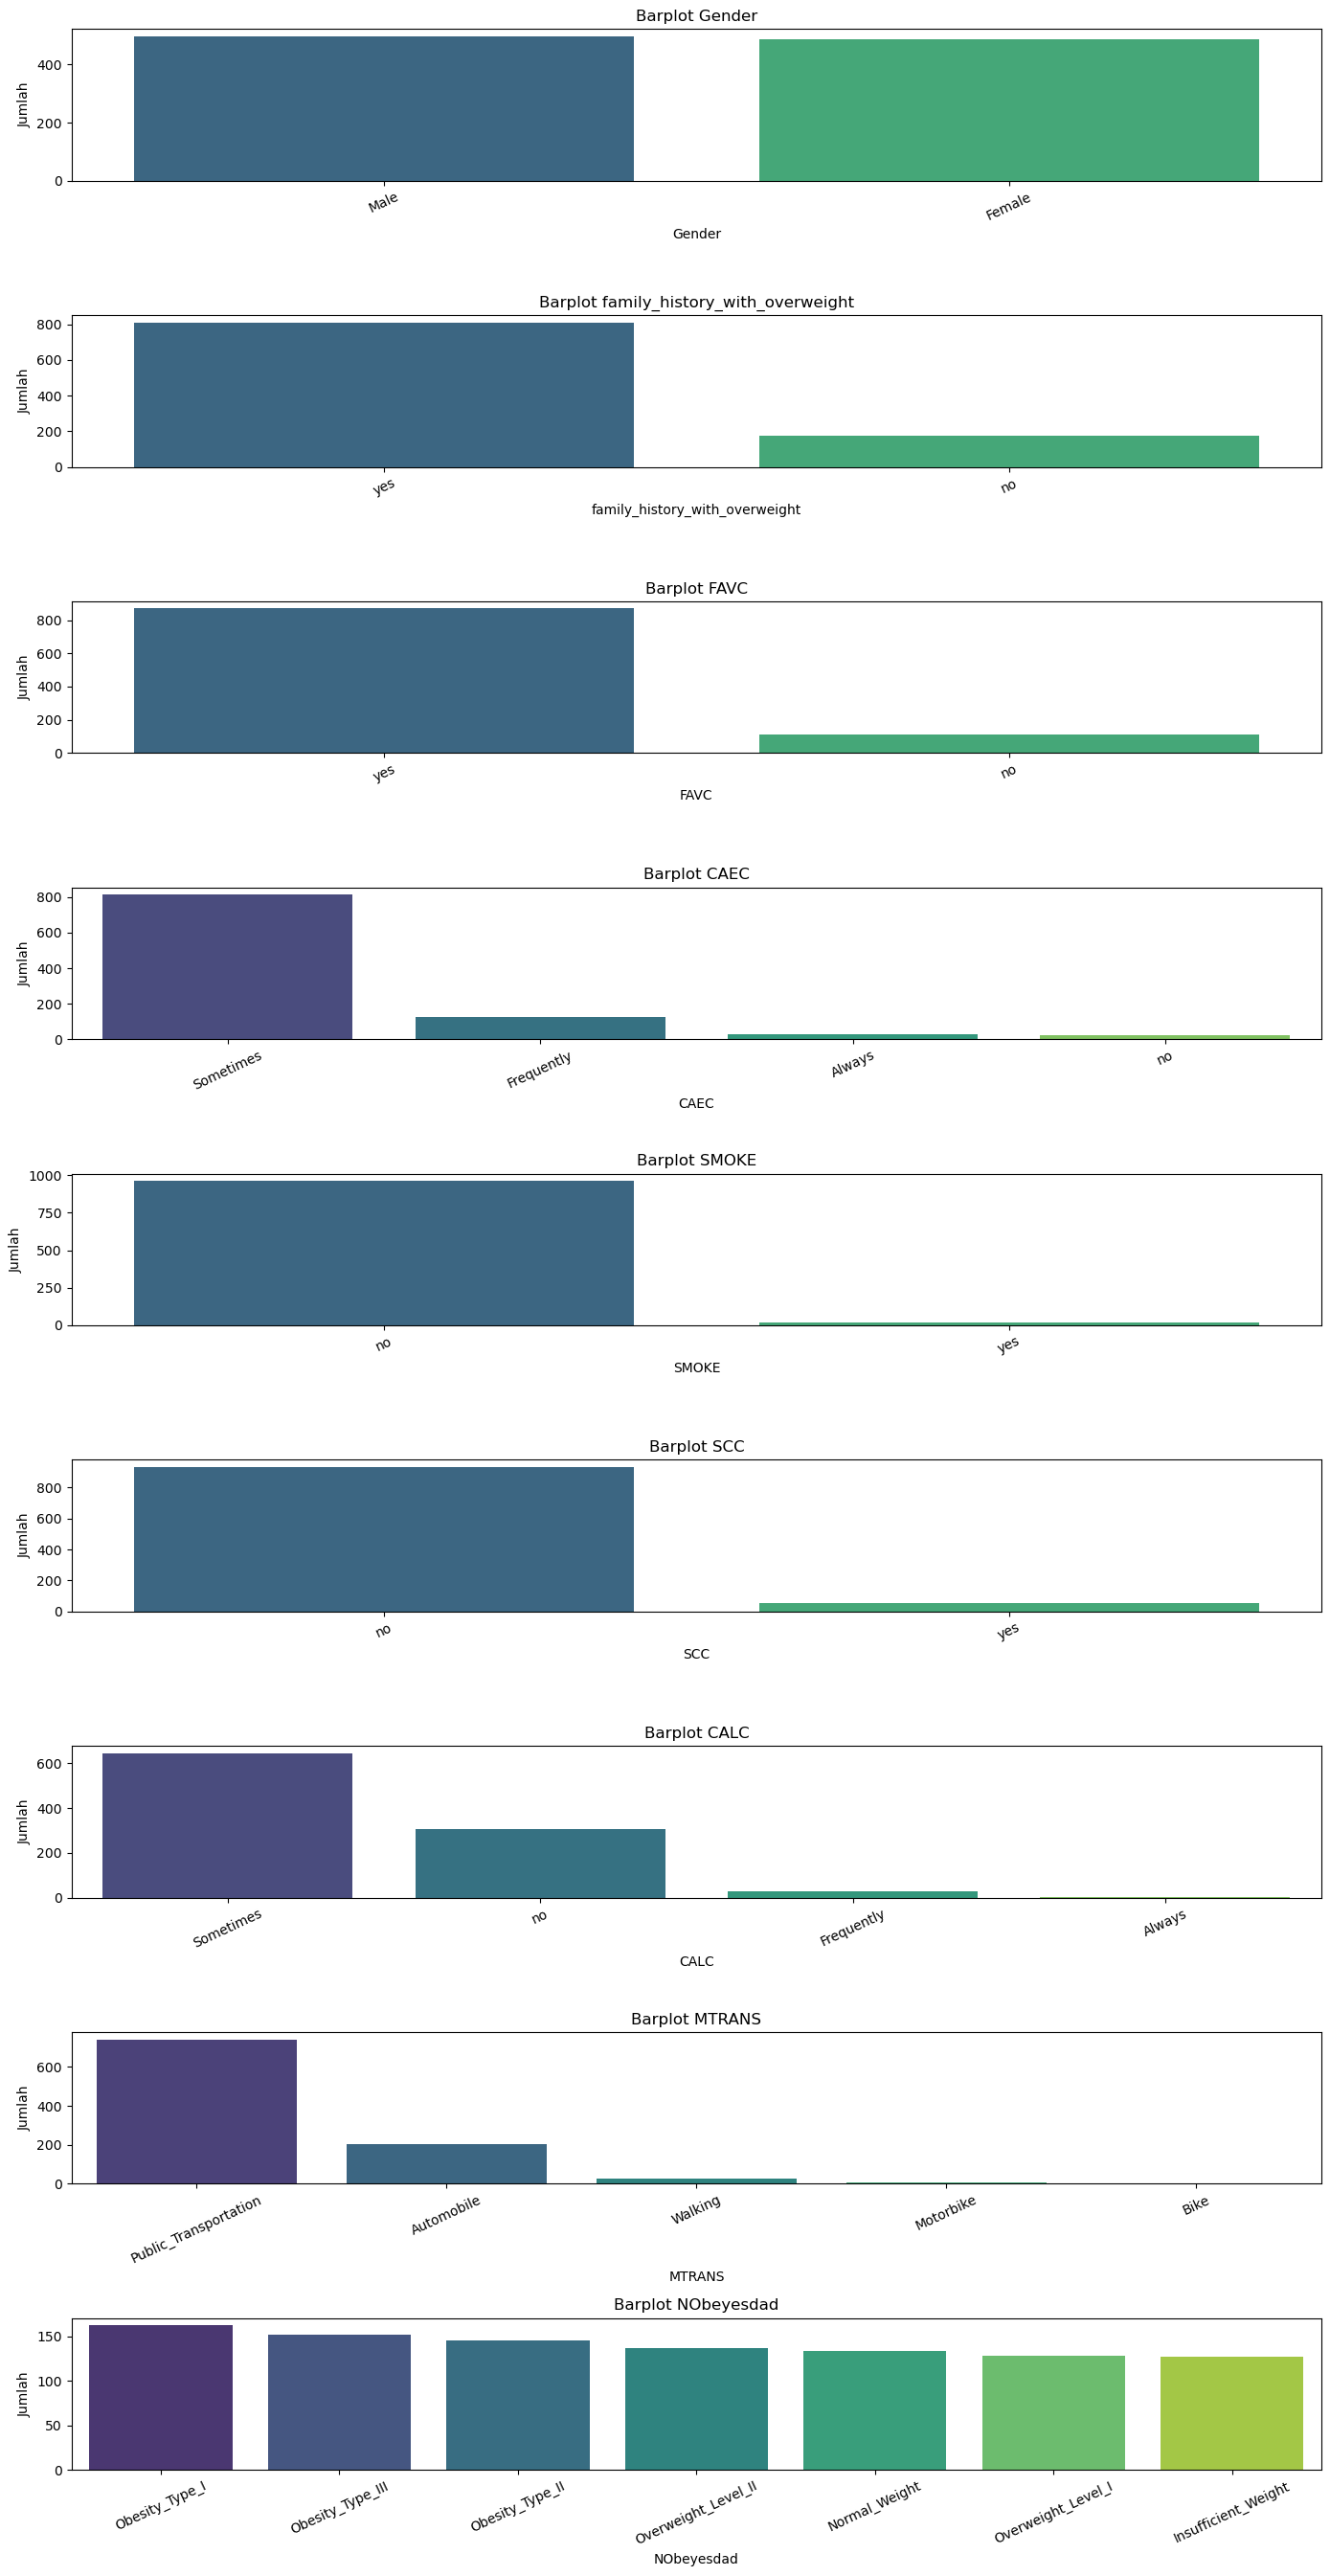

In [197]:
plt.figure(figsize=(14, len(cat_cols)*3))
for i, col in enumerate(cat_cols):
    plt.subplot(len(cat_cols), 1, i+1)
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Barplot {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

1. Gender
Jumlah responden laki-laki dan perempuan hampir seimbang, meskipun sedikit lebih banyak perempuan. Artinya, analisis ke depannya nggak terlalu bias gender.

2. family_history_with_overweight
Mayoritas responden punya riwayat keluarga overweight (yes), jadi faktor genetik kemungkinan cukup berperan dalam populasi ini.

3. FAVC (Frequent consumption of high caloric food)
Sebagian besar responden mengaku sering makan makanan tinggi kalori. Kondisi ini bisa jadi salah satu penyebab utama banyaknya kasus overweight atau obesitas di dataset ini.

4. CAEC (Eating between meals)
Kebiasaan ngemil dimana “sometimes” jauh lebih banyak daripada kategori lain, dengan yang “frequently” dan “always” hanya sedikit. Hanya sedikit responden yang benar-benar nggak pernah ngemil.

5. SMOKE
Hampir semua responden bukan perokok. Jadi, faktor rokok kemungkinan kecil berpengaruh ke variabel obesitas dalam data ini.

6. SCC (Monitor calories)
Mayoritas responden tidak memonitor asupan kalori hariannya. Hal ini bisa berpotensi meningkatkan risiko kelebihan berat badan karena kurang kontrol pola makan.

7. CALC (Alcohol consumption)
Sebagian besar responden mengonsumsi alkohol hanya “sometimes” atau tidak sama sekali. Konsumsi alkohol yang sering atau selalu hampir tidak ada.

8. MTRANS (Transportation)
Transportasi paling umum yang digunakan adalah “Public Transportation”, disusul “Automobile”. Sedikit sekali responden yang jalan kaki, naik motor, atau naik sepeda ke aktivitas harian. Oleh karena itu untuk kolom ini kita akan uat walking, Motorbike dan juga Bike menjadi satu kesatuan kategori yaitu (others)

9. NObeyesdad (Kategori Obesitas/Target)
Kelas target cukup seimbang antar kategori, dengan “Obesity_Type_I” jumlahnya sedikit lebih tinggi daripada kategori lain. Artinya, model yang dibangun nanti harus tetap memperhatikan semua kelas karena distribusinya relatif merata.

In [198]:
df['MTRANS'] = df['MTRANS'].replace({
    'Walking': 'Others',
    'Motorbike': 'Others',
    'Bike': 'Others'
})

/var/folders/k8/0jttqwyj0vdg5y3q78vqjy1c0000gn/T/ipykernel_25439/4183506693.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='viridis')
/var/folders/k8/0jttqwyj0vdg5y3q78vqjy1c0000gn/T/ipykernel_25439/4183506693.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='viridis')
/var/folders/k8/0jttqwyj0vdg5y3q78vqjy1c0000gn/T/ipykernel_25439/4183506693.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,

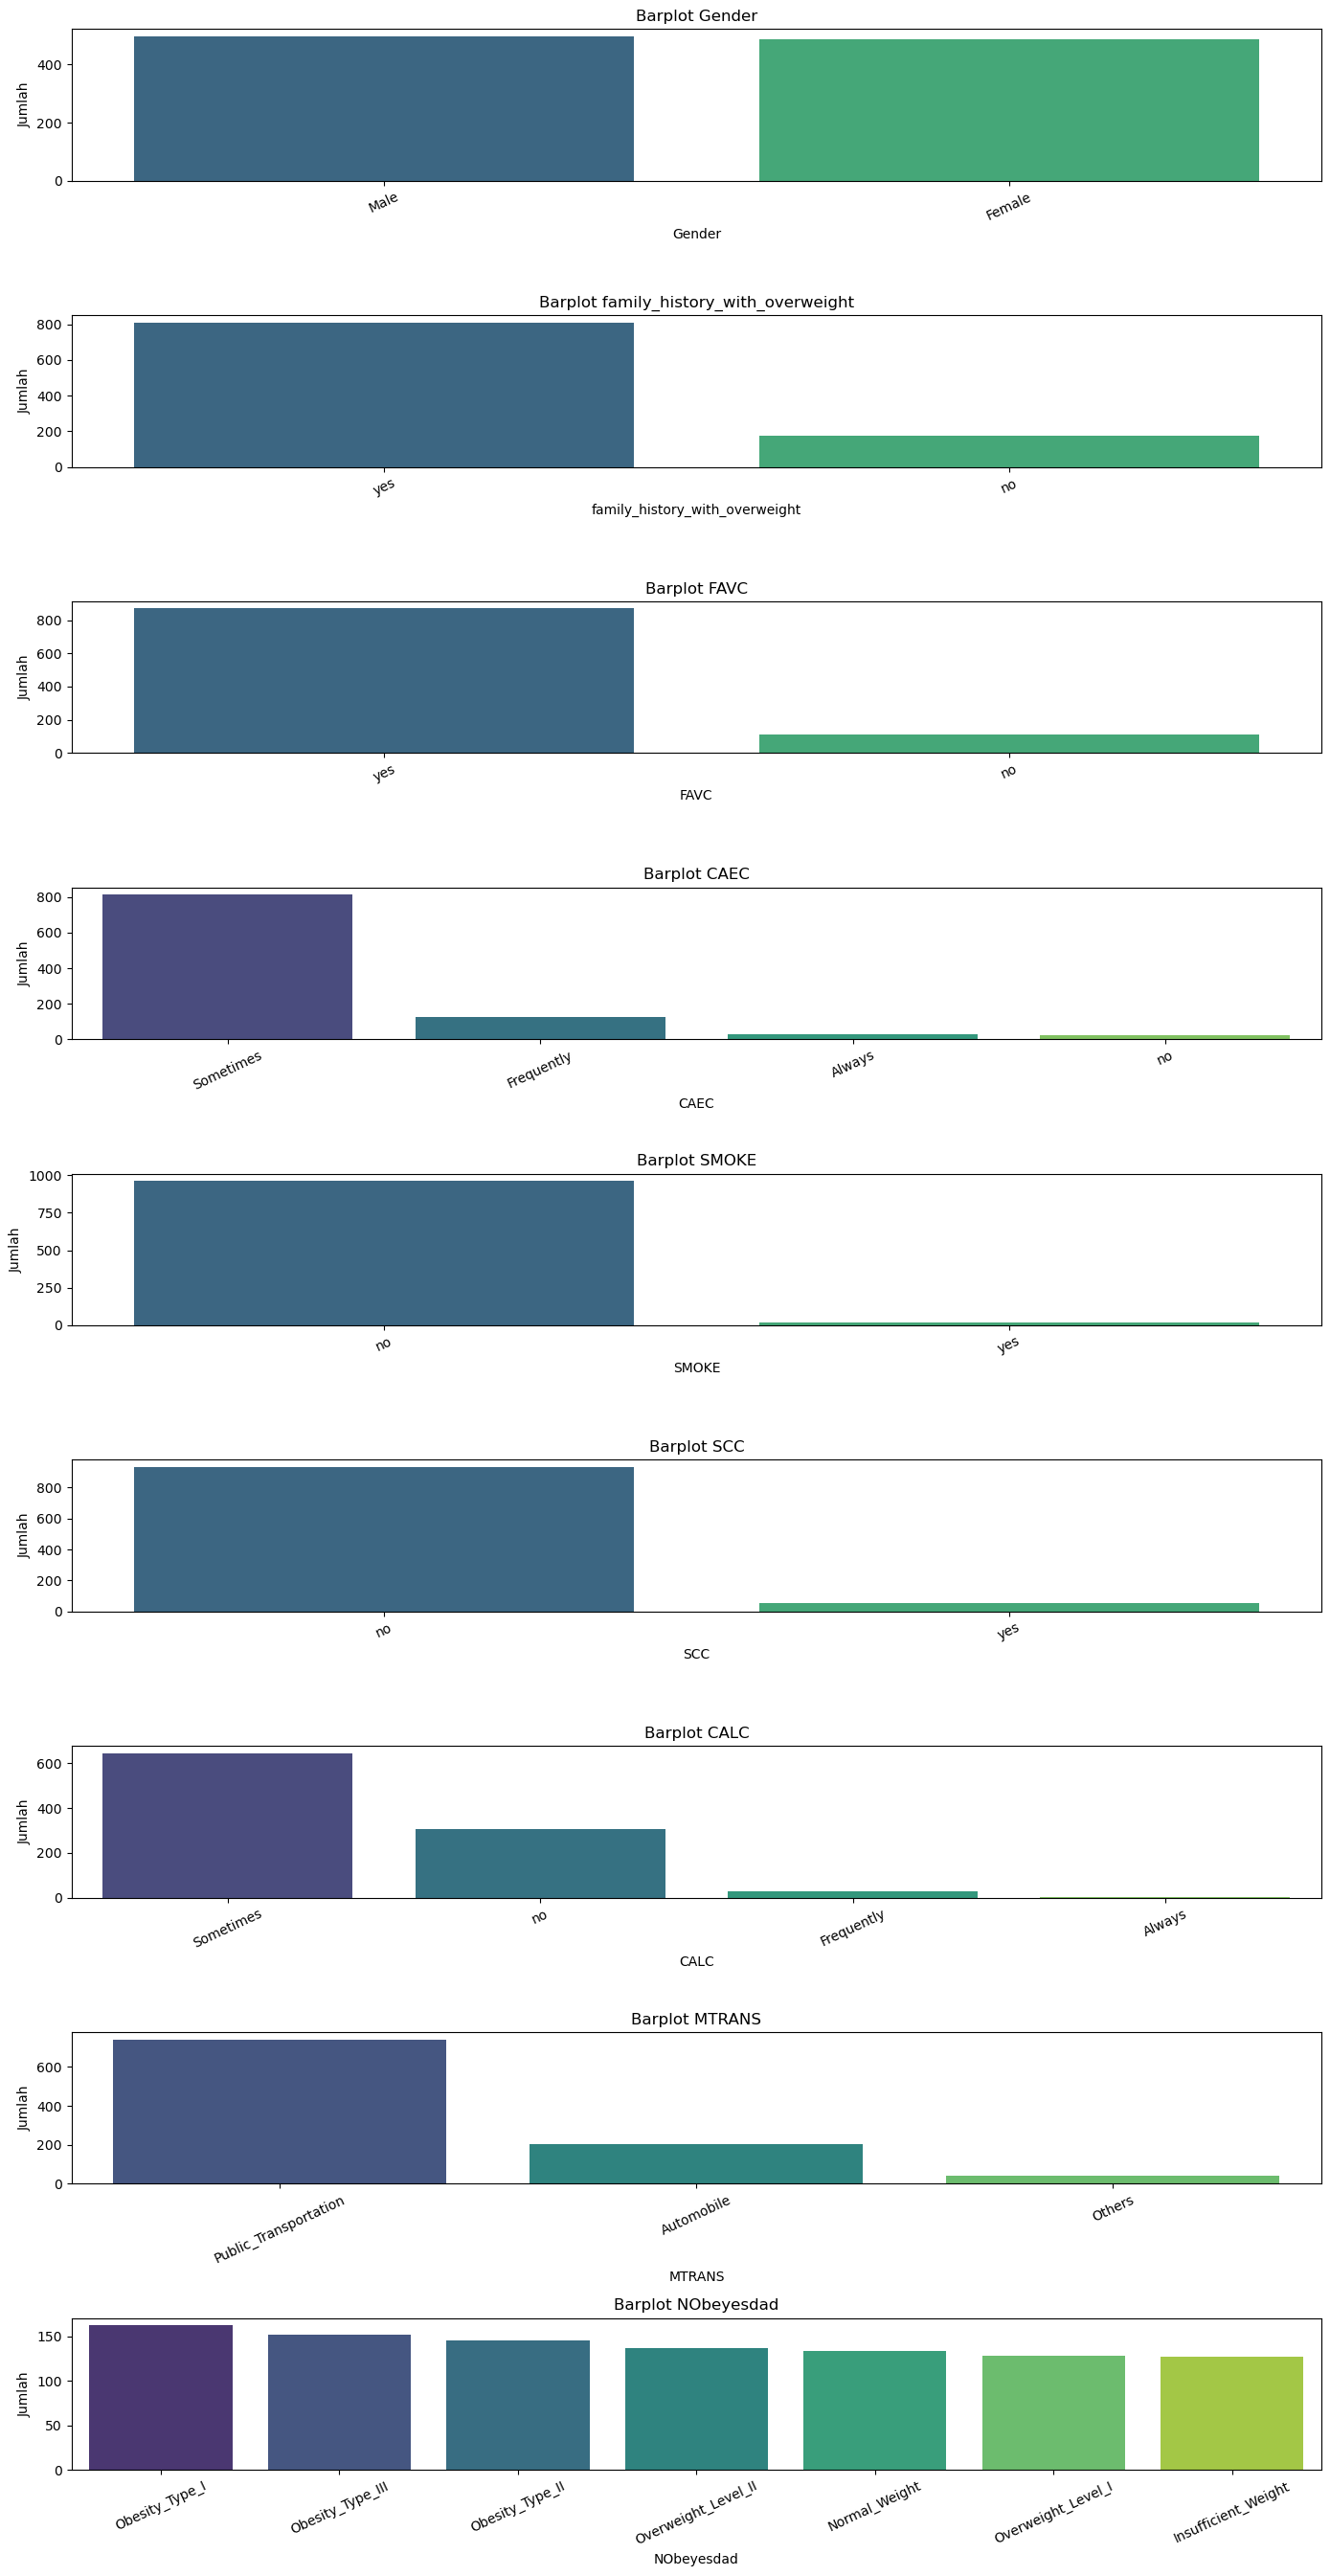

In [199]:
plt.figure(figsize=(14, len(cat_cols)*3))
for i, col in enumerate(cat_cols):
    plt.subplot(len(cat_cols), 1, i+1)
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Barplot {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

## Visualization Categorical Compartion

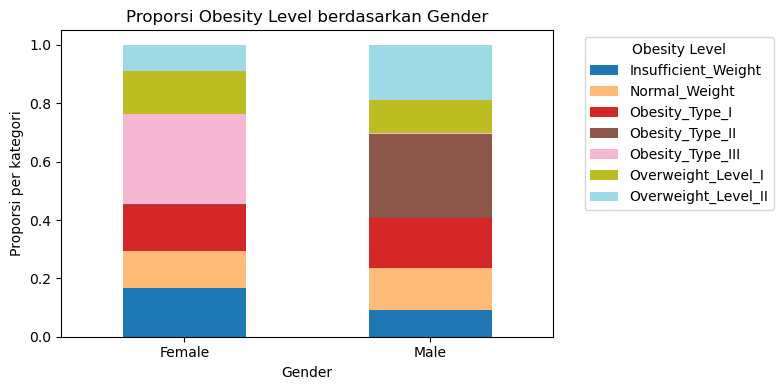

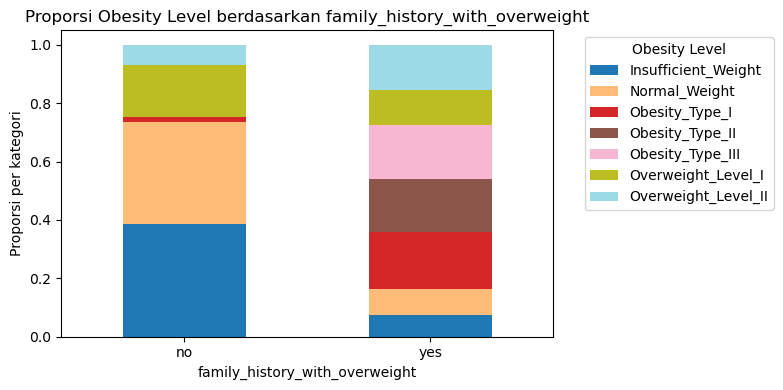

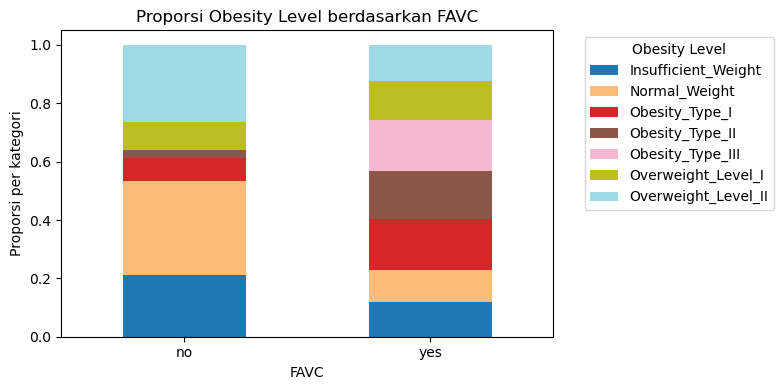

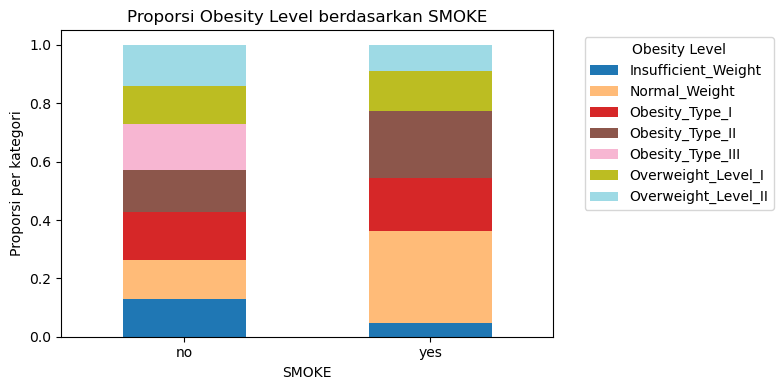

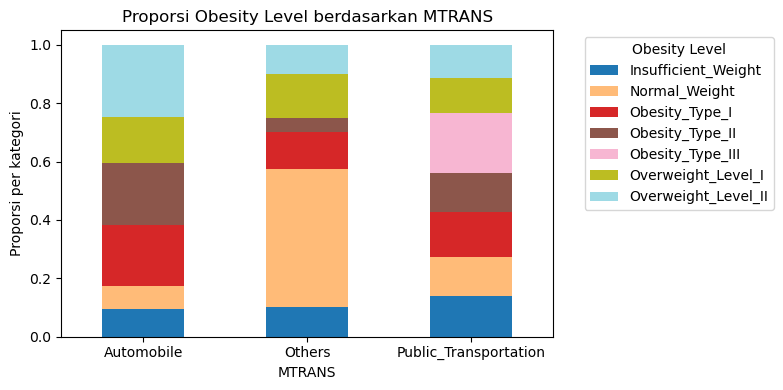

In [233]:
cat_for_crosstab = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'MTRANS']

for col in cat_for_crosstab:
    ctab = pd.crosstab(df[col], df['NObeyesdad'], normalize='index')
    ctab.plot(
        kind='bar',
        stacked=True,
        figsize=(8, 4),
        colormap='tab20'
    )
    plt.title(f"Proporsi Obesity Level berdasarkan {col}")
    plt.ylabel("Proporsi per kategori")
    plt.xlabel(col)
    plt.xticks(rotation=0)
    plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


1. Gender vs Obesity Level
Distribusi proporsi obesitas pada kedua gender tampak cukup berimbang, namun terlihat bahwa proporsi obesitas berat (“Obesity_Type_II” dan “Obesity_Type_III”) sedikit lebih tinggi pada laki-laki dibandingkan perempuan. Sementara pada perempuan, proporsi “Normal_Weight” dan “Insufficient_Weight” sedikit lebih besar. Hal ini mengindikasikan bahwa walaupun kecenderungan obesitas terdapat pada kedua gender, laki-laki cenderung memiliki resiko obesitas berat yang lebih tinggi.

2. Family History With Overweight vs Obesity Level
Terdapat perbedaan proporsi obesitas yang sangat jelas antara responden dengan dan tanpa riwayat keluarga overweight. Mereka yang memiliki riwayat keluarga overweight (“yes”) cenderung memiliki proporsi yang lebih besar pada kelas obesitas, terutama pada “Obesity_Type_I”, “II”, dan “III”. Sebaliknya, kelompok tanpa riwayat keluarga overweight (“no”) cenderung didominasi oleh kategori “Normal_Weight” dan “Insufficient_Weight”. Ini memperkuat peran faktor genetik atau lingkungan keluarga dalam risiko obesitas.

3. FAVC (Frequent High Caloric Food) vs Obesity Level
Responden yang sering mengonsumsi makanan tinggi kalori (“yes”) menunjukkan proporsi kelas obesitas yang jauh lebih besar dibandingkan yang tidak. Pada kelompok yang menjawab “no”, proporsi terbesar justru ada di kategori “Normal_Weight” dan “Insufficient_Weight”. Pola ini konsisten dengan literatur bahwa pola konsumsi makanan tinggi kalori berhubungan erat dengan peningkatan risiko obesitas.

4. SMOKE vs Obesity Level
Pada kelompok perokok (“yes”), proporsi terbesar justru ada pada “Normal_Weight” dan “Obesity_Type_I/II”, sementara proporsi “Insufficient_Weight” lebih kecil dibandingkan non-perokok. Di sisi lain, responden yang tidak merokok memiliki distribusi yang lebih merata ke seluruh kelas obesitas. Pola ini bisa menunjukkan adanya hubungan antara kebiasaan merokok dan pola berat badan, meskipun efeknya tidak sekuat faktor diet dan riwayat keluarga.

5. MTRANS vs Obesity Level
Kategori transportasi menunjukkan tren yang menarik: responden yang menggunakan transportasi umum (“Public_Transportation”) dan mobil (“Automobile”) cenderung memiliki proporsi kelas obesitas yang lebih besar dibandingkan kelompok “Others” (jalan kaki, motor, sepeda). Pada kelompok “Others”, proporsi “Normal_Weight” jauh lebih tinggi. Hal ini mengindikasikan bahwa aktivitas fisik yang lebih besar (misal: jalan kaki, sepeda) mungkin berkontribusi pada status berat badan yang lebih sehat.

## Correlation HeatMap

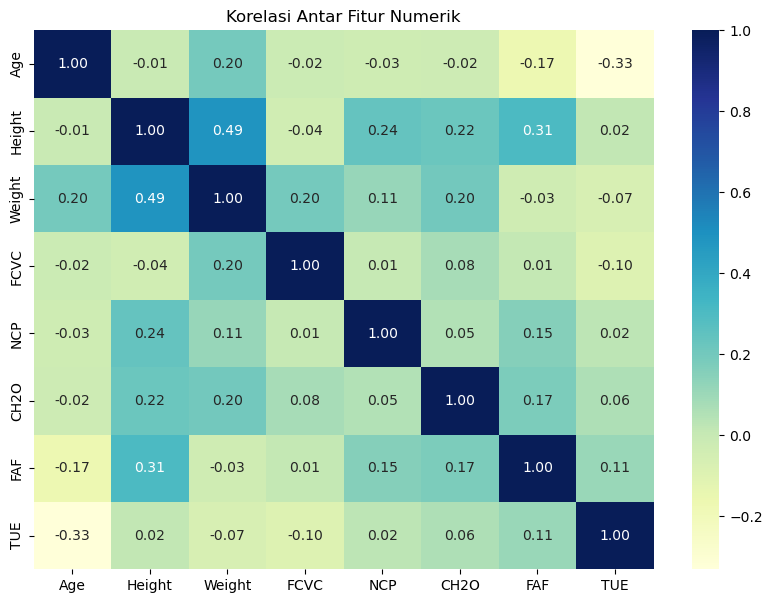

In [200]:
corr = df[num_cols].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title("Korelasi Antar Fitur Numerik")
plt.show()

Dari hasil heatmap korelasi antar fitur numerik, terlihat bahwa tidak ada pasangan fitur yang memiliki korelasi sangat tinggi. Korelasi terbesar ada pada pasangan tinggi badan dan berat badan, namun nilainya masih di bawah 0.5, sehingga keduanya tetap memberikan informasi yang berbeda pada data. Korelasi-korelasi lain juga cenderung lemah, sehingga tidak ditemukan fitur yang benar-benar redundant atau memberikan informasi ganda secara signifikan. Dengan kondisi seperti ini, semua fitur numerik tetap dipertahankan agar model machine learning nantinya dapat memanfaatkan variasi informasi yang ada secara maksimal.

# Preprocessing

## Split Train & Testing

In [201]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train: {X_train.shape[0]} baris, Test: {X_test.shape[0]} baris")


Train: 787 baris, Test: 197 baris


## Find Column of the Categorical & Numerical 

In [202]:
categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X_train.select_dtypes(include=["float64", "int64"]).columns.tolist()

In [ ]:
numeric_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
ordinal_features = ['CAEC', 'CALC']
binary_features = ['FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight']
nominal_features = ['Gender', 'MTRANS']

ordinal_categories = [
    ['no', 'Sometimes', 'Frequently', 'Always'], 
    ['no', 'Sometimes', 'Frequently', 'Always']   
]
# Untuk binary, urutannya: no=0, yes=1
binary_categories = [['no', 'yes']] * len(binary_features)


## Scaling Pipeline

In [213]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

Alasan utama saya memilih StandardScaler adalah karena data numerik yang digunakan relatif terdistribusi normal dan tidak terdapat outlier yang ekstrem. Selain itu, StandardScaler sangat umum digunakan pada berbagai algoritma machine learning karena membuat proses training menjadi lebih stabil dan mempercepat konvergensi model, terutama pada algoritma yang sensitif terhadap skala data seperti Support Vector Machine (SVM). Dengan penyesuaian skala ini, model jadi lebih mudah menemukan pola penting dalam data tanpa dipengaruhi oleh besaran fitur tertentu.

## Encoding Using One Hot Encoder

In [ ]:
ordinal_transformer = Pipeline(steps=[
    ("ordinal", OrdinalEncoder(categories=ordinal_categories))
])

Fitur kategorikal ordinal seperti CAEC dan CALC memiliki urutan makna (misal: “no” < “Sometimes” < “Frequently” < “Always”). Oleh karena itu, digunakan OrdinalEncoder agar nilai encoding-nya mengikuti urutan logis pada data, sehingga model dapat menangkap perbedaan level antar kategori dengan benar.

In [220]:
binary_transformer = Pipeline(steps=[
    ("binary", OrdinalEncoder(categories=binary_categories))
])

Fitur-fitur seperti FAVC, SCC, SMOKE, dan family_history_with_overweight adalah fitur biner (hanya dua nilai: “yes”/“no”). Fitur-fitur ini bisa di-encode menggunakan OrdinalEncoder (dengan kategori [“no”, “yes”]), yang dalam praktiknya sama dengan LabelEncoder. Dengan cara ini, nilai “no” diubah menjadi 0 dan “yes” menjadi 1. Teknik ini dipilih karena fitur biner memang tidak memerlukan transformasi khusus seperti one-hot.

In [ ]:
nominal_transformer = Pipeline(steps=[
    ("nominal", OrdinalEncoder())  
])

Fitur kategorikal nominal seperti Gender dan MTRANS tidak memiliki urutan, hanya membedakan antar kategori (misal: “Male” dan “Female”, atau “Automobile”, “Public_Transportation”, dll). Pada pipeline ini, digunakan OrdinalEncoder agar semua fitur dapat masuk ke model tanpa menambah dimensi fitur (seperti pada OneHotEncoder). Namun, jika ingin menghindari asumsi hubungan urutan antar kategori, OneHotEncoder bisa dipilih, terutama jika jumlah kategorinya tidak terlalu banyak.

## Preprocesser = ColumnTransforming

In [215]:
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("ord", ordinal_transformer, ordinal_features),
    ("bin", binary_transformer, binary_features),
    ("nom", nominal_transformer, nominal_features)
])

# Training & Testing

## Random Forest

In [ ]:
pipeline_rf = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

## SVM

In [ ]:
pipeline_svc = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", SVC(random_state=42))
])

In [ ]:
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)

pipeline_svc.fit(X_train, y_train)
y_pred_svc = pipeline_svc.predict(X_test)



print("Random Forest")
print(classification_report(y_test, y_pred_rf))
print("Akurasi RF:", accuracy_score(y_test, y_pred_rf))

print("\nSupport Vector Classifier")
print(classification_report(y_test, y_pred_svc))
print("Akurasi SVC:", accuracy_score(y_test, y_pred_svc))

Random Forest
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        23
      Normal_Weight       0.84      0.88      0.86        24
     Obesity_Type_I       0.90      0.96      0.93        27
    Obesity_Type_II       1.00      1.00      1.00        30
   Obesity_Type_III       1.00      1.00      1.00        32
 Overweight_Level_I       0.89      0.76      0.82        21
Overweight_Level_II       0.85      0.88      0.86        40

           accuracy                           0.92       197
          macro avg       0.93      0.92      0.92       197
       weighted avg       0.92      0.92      0.92       197

Akurasi RF: 0.9238578680203046

Support Vector Classifier
                     precision    recall  f1-score   support

Insufficient_Weight       0.85      1.00      0.92        23
      Normal_Weight       0.73      0.67      0.70        24
     Obesity_Type_I       0.84      0.96      0.90        27
    Obesi

Model Random Forest menunjukkan performa klasifikasi yang sangat baik pada data obesitas dengan akurasi mencapai 92%. Hampir semua kelas, baik mayoritas maupun minoritas, memperoleh nilai precision, recall, dan f1-score yang tinggi—bahkan pada beberapa kelas tertentu, f1-score mencapai angka sempurna. Hal ini menunjukkan bahwa Random Forest sangat mampu membedakan berbagai kategori obesitas secara konsisten. Satu-satunya catatan kecil hanya pada kelas "Overweight_Level_I" yang memiliki recall sedikit lebih rendah, namun secara keseluruhan performa model sangat memuaskan.

Keunggulan utama Random Forest terletak pada kemampuannya menangani data dengan banyak fitur dan kelas tanpa risiko overfitting yang besar. Dengan hasil evaluasi yang sangat stabil, Random Forest menjadi pilihan utama sebagai model prediksi obesitas pada proyek ini. Untuk memaksimalkan performa, langkah selanjutnya adalah melakukan hyperparameter tuning agar model benar-benar optimal sebelum digunakan pada proses deployment.

Support Vector Classifier (SVC) juga memberikan hasil prediksi yang cukup baik, dengan akurasi 86%. SVC mampu menghasilkan precision dan recall yang tinggi pada beberapa kelas utama, terutama pada kategori obesitas tipe dua dan tiga. Namun, pada kelas lain seperti "Normal_Weight", model ini cenderung kurang konsisten dengan f1-score yang lebih rendah dibandingkan Random Forest. Hal ini menunjukkan bahwa SVC meskipun kuat, masih memiliki keterbatasan dalam membedakan distribusi kelas yang lebih kompleks pada dataset ini.

# Evaluasi



Berdasarkan hasil evaluasi kedua model, Random Forest dipilih sebagai model terbaik untuk prediksi status obesitas karena keunggulan akurasi dan kestabilannya di seluruh kategori. Selanjutnya, model Random Forest akan dioptimalkan lebih lanjut melalui hyperparameter tuning dan disimpan sebagai pipeline terbaik yang siap digunakan untuk deployment pada backend aplikasi prediksi obesitas.

# HyperParameter Tuning

In [ ]:

param_grid = {
    "classifier__n_estimators": [100, 200, 300, 500],
    "classifier__max_depth": [None, 5, 10, 20, 30],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4]
}

pipeline_rf = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

grid_search = GridSearchCV(
    pipeline_rf, 
    param_grid=param_grid, 
    cv=3, 
    n_jobs=-1,
    verbose=2,
    scoring="accuracy"
)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)
tuned_acc = accuracy_score(y_test, y_pred_rf_tuned)
print("Akurasi Random Forest hasil tuning:", tuned_acc)


Fitting 3 folds for each of 180 candidates, totalling 540 fits
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.4s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.4s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.5s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.9s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.5s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.5s
[CV] END classifier__max_depth=

Berdasarkan hasil evaluasi, model Random Forest dengan parameter default justru memberikan performa yang lebih baik dibandingkan model hasil hyperparameter tuning. Meskipun telah dilakukan pencarian kombinasi parameter terbaik menggunakan GridSearchCV, akurasi model pada data uji setelah tuning ternyata lebih rendah dibandingkan model default. Hal ini bisa terjadi karena parameter default Random Forest pada dasarnya sudah sangat sesuai untuk karakteristik data ini, sehingga tuning parameter justru membuat model kurang optimal dalam melakukan generalisasi.

Oleh karena itu, pipeline model Random Forest dengan parameter default dipilih sebagai model terbaik dan akan disimpan dalam format pickle. Model inilah yang nantinya akan digunakan pada proses deployment backend untuk aplikasi prediksi obesitas, karena terbukti memberikan hasil prediksi paling akurat dan stabil pada data uji.

In [229]:
rf_model = pipeline_rf.named_steps["classifier"]
print(rf_model.get_params())

print("n_estimators:", rf_model.n_estimators)
print("max_depth:", rf_model.max_depth)
print("min_samples_split:", rf_model.min_samples_split)
print("min_samples_leaf:", rf_model.min_samples_leaf)
default_acc = accuracy_score(y_test, y_pred_rf)
print("\nAkurasi model default Random Forest pada data uji:", default_acc)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
n_estimators: 100
max_depth: None
min_samples_split: 2
min_samples_leaf: 1

Akurasi model default Random Forest pada data uji: 0.9238578680203046


In [234]:
import pickle

# Asumsikan pipeline modelmu bernama pipeline_rf_default
with open('best_model_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline_rf, f)

print("Model Random Forest terbaik berhasil disimpan sebagai 'best_model_pipeline.pkl'.")


Model Random Forest terbaik berhasil disimpan sebagai 'best_model_pipeline.pkl'.
